### EDA of Fraud Risk Modeling

**Exploratory Data Analysis (EDA)** helps to visualize the dataset to determine how best to manipulate the data sources to get the answers that we need, ensuring the best outcomes for the project. It is an approach for summarizing, visualizing, and becoming intimately familiar with the important characteristics of a data set. 

In this project, firstly, we used **Univariate visualization** to provide summary statistics for some field in the dataset. Secondly, we ranked the features by importance to look at the relationship between all the categorical features

In the first part, we are looking for the following statistics in this dataset. 
- The percentages of fraud and non-fraud dataset.
- Identify the seasonality trends in fraudulent accounts.
- Explore whether the fraud rates have trended up or down over time.
- Explore and identify differences in the fraud rate between different products offered by the company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

The fraud risk dataset is very large with 19030 rows and 2330 columns. The Experian Dictionary is a data dictionary that accompanies the fraud risk data set. This document provides a description of what the columns represent. The dataset the columns are represented by arbitraty letters and numbers. Among these 2330 variables there are many that are similar to one another, for instance ALL0416 represents "Total number of open trades reported in the last 6 months" while ALL0436 represents "Total number of open trades opened in the last 6 months".  

In [2]:
df_credit = pd.read_csv('fraud_risk_dataset.csv', header=0,index_col=0)
df_credit.head()

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,1908,500,0,0,2,1,1,33521,50283,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,1908,500,0,0,1,0,0,999999997,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1908,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,1908,500,0,1,2,0,0,999999997,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [3]:
list(df_credit.columns[:20])

['portfolio_id',
 'product_term_credit_limit',
 'NP',
 'cash_intent',
 'ALJ0300',
 'ALJ0316',
 'ALJ0416',
 'ALJ5030',
 'ALJ5320',
 'ALJ5730',
 'ALJ5820',
 'ALJ5830',
 'ALJ8120',
 'ALJ8220',
 'ALL0000',
 'ALL0060',
 'ALL0061',
 'ALL0100',
 'ALL0101',
 'ALL0102']

In [4]:
df_credit.dtypes

portfolio_id                   int64
product_term_credit_limit      int64
NP                             int64
cash_intent                    int64
ALJ0300                        int64
                              ...   
TSTU3907                     float64
TSTU3908                     float64
TSTU4906                     float64
TSTU4907                     float64
TSTU4908                     float64
Length: 2329, dtype: object

In [5]:
print(df_credit.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19030 entries, 1 to 19030
Columns: 2329 entries, portfolio_id to TSTU4908
dtypes: float64(836), int64(1493)
memory usage: 338.3 MB
None


In [6]:
print(df_credit.nunique())

portfolio_id                 17
product_term_credit_limit     4
NP                            2
cash_intent                   2
ALJ0300                      30
                             ..
TSTU3907                     12
TSTU3908                     12
TSTU4906                      6
TSTU4907                     20
TSTU4908                     20
Length: 2329, dtype: int64


In [7]:
data = df_credit[['portfolio_id','product_term_credit_limit','NP','cash_intent']].copy()

In [8]:
df_NP = data[['NP','product_term_credit_limit']].groupby('NP').count()
df_NP

,product_term_credit_limit
NP,
0,17305
1,1725


In [9]:
df_credit.portfolio_id.unique()
#2019-08 to 2021-05

array([1908, 1909, 1910, 1912, 2001, 2002, 2003, 2006, 2007, 2008, 2009,
       2011, 2012, 2102, 2103, 2104, 2105], dtype=int64)

In [10]:
df_credit.product_term_credit_limit.unique()

array([ 500, 1000,  750,  300], dtype=int64)

In [11]:
df_credit.NP.value_counts()

0    17305
1     1725
Name: NP, dtype: int64

In [12]:
df_credit.cash_intent.value_counts()

0    15678
1     3352
Name: cash_intent, dtype: int64

In [13]:
Nfraud = df_credit[df_credit['NP'] == 0]
fraud = df_credit[df_credit['NP'] == 1]

outlier_fraction  = len(Nfraud)/float(len(fraud))
print(outlier_fraction)

print('Non Fraud transactions: {}'.format(len(Nfraud)))
print('Fraud transactions: {}'.format(len(fraud)))

10.031884057971014
Non Fraud transactions: 17305
Fraud transactions: 1725


In [14]:
cc_Data = df_credit.copy()

In [15]:
cc_Data['portfolio_id'] = '20' + cc_Data['portfolio_id'].astype(str)

In [16]:
cc_Data['portfolio_id'] = pd.to_datetime(cc_Data['portfolio_id'], format='%Y%m')
cc_Data.head()

,portfolio_id,product_term_credit_limit,NP,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,...,TSTU0910,TSTU2906,TSTU2907,TSTU2908,TSTU3906,TSTU3907,TSTU3908,TSTU4906,TSTU4907,TSTU4908
record_nb,,,,,,,,,,,,,,,,,,,,,
1,2019-08-01,500,0,0,2,1,1,33521,50283,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-08-01,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
3,2019-08-01,500,0,0,1,0,0,999999997,999999997,999999997,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-08-01,500,0,0,0,98,98,999999998,999999998,999999998,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0
5,2019-08-01,500,0,1,2,0,0,999999997,999999997,999999997,...,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0,98.0,999999998.0,999999998.0


In [17]:
# Dropping columns where there are 100% missing values. Clearly these columns are not useful for the analysis.
master = cc_Data.dropna(axis='columns',how='all')
round(100*(cc_Data.isnull().sum()/len(cc_Data.index)), 2)

portfolio_id                 0.00
product_term_credit_limit    0.00
NP                           0.00
cash_intent                  0.00
ALJ0300                      0.00
                             ... 
TSTU3907                     0.01
TSTU3908                     0.01
TSTU4906                     0.01
TSTU4907                     0.01
TSTU4908                     0.01
Length: 2329, dtype: float64

In [18]:
master.shape

(19030, 2329)

In [19]:
round(100*master.groupby('NP').size()/len(master),2)

NP
0    90.94
1     9.06
dtype: float64

In [20]:
round(100*master.groupby('cash_intent').size()/len(master),2)

cash_intent
0    82.39
1    17.61
dtype: float64

<AxesSubplot:title={'center':'Applicants with Cash Intent Vs Not Intent'}>

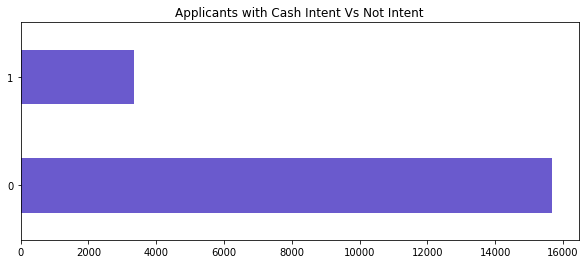

In [21]:
plt.figure(figsize=(10, 4))
plt.title('Applicants with Cash Intent Vs Not Intent')
master['cash_intent'].value_counts()[:2].plot(kind='barh', color="slateblue")

[Text(0.5, 0, 'Paid Status'), Text(0, 0.5, 'Count')]

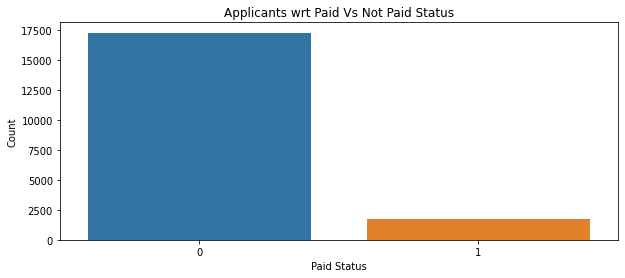

In [22]:
#code from https://github.com/vickysort/Exploratory-Data-Analysis/blob/main/Gramener%20Case%20Study.ipynb
plt.figure(figsize=(10, 4))
plt.title('Applicants wrt Paid Vs Not Paid Status')
ax = sns.countplot(x = "NP", data = master);
ax.set(xlabel='Paid Status', ylabel='Count')

In [23]:
master['issue_yr']=master['portfolio_id'].dt.year
master['issue_month']=master['portfolio_id'].dt.month
master['Quarter']=master['portfolio_id'].dt.quarter

In [24]:
Nfraud = master[master['NP'] == 0]
fraud = master[master['NP'] == 1]

**Analysis of Fraud applicants**

In [25]:
round(100*fraud.groupby('issue_yr').size()/len(fraud),2).reset_index(name='fraud_percent').sort_values('fraud_percent',ascending=False)

,issue_yr,fraud_percent
2,2021,43.83
1,2020,37.62
0,2019,18.55


In [26]:
round(100*Nfraud.groupby('issue_yr').size()/len(Nfraud),2).reset_index(name='Nfraud_percent').sort_values('Nfraud_percent',ascending=False)

,issue_yr,Nfraud_percent
2,2021,56.34
1,2020,35.56
0,2019,8.10


In [27]:
# fraud by quarter, 4th quarter tops
round(100*fraud.groupby(['Quarter']).size()/len(fraud),2).reset_index(name='fraud_percent').sort_values('fraud_percent',ascending=False)

,Quarter,fraud_percent
0,1,45.45
1,2,27.19
3,4,23.54
2,3,3.83


In [28]:
round(100*Nfraud.groupby(['Quarter']).size()/len(Nfraud),2).reset_index(name='Nfraud_percent').sort_values('Nfraud_percent',ascending=False)

,Quarter,Nfraud_percent
0,1,68.96
3,4,16.71
1,2,10.67
2,3,3.66


In [29]:
# Fraud by year and quarter, all year
round(100*fraud.groupby(['issue_yr','Quarter']).size()/len(fraud),2).reset_index(name='percent').sort_values(['percent','Quarter'],ascending=False)

,issue_yr,Quarter,percent
6,2021,1,24.29
2,2020,1,21.16
7,2021,2,19.54
1,2019,4,15.13
5,2020,4,8.41
3,2020,2,7.65
0,2019,3,3.42
4,2020,3,0.41


**Univariate analysis of product credit limit**

In [30]:
# displaying frequencies of each category
fraud['product_term_credit_limit'].value_counts()

300     985
500     389
1000    191
750     160
Name: product_term_credit_limit, dtype: int64

[Text(0.5, 0, 'Product Credit Limit'), Text(0, 0.5, 'Count')]

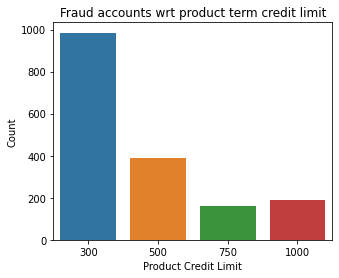

In [31]:
plt.figure(figsize=(5, 4))
plt.title('Fraud accounts wrt product term credit limit')
ax = sns.countplot(x = "product_term_credit_limit", data = fraud);
ax.set(xlabel='Product Credit Limit', ylabel='Count')

In [32]:
grouped1 = fraud.groupby(['product_term_credit_limit'])
size1 = grouped1.size()

grouped_NF = Nfraud.groupby(['product_term_credit_limit'])
size_NF = grouped_NF.size()

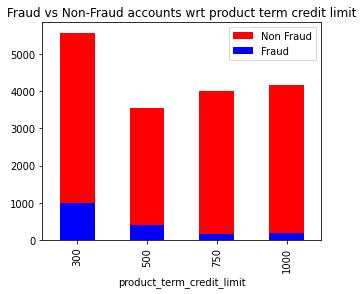

In [33]:
size_NF.plot(subplots=True, kind='bar',color = 'r', figsize= (5,4), label = "Non Fraud")
size1.plot(subplots=True,kind='bar',color = 'b', figsize= (5,4), label = "Fraud")
plt.title('Fraud vs Non-Fraud accounts wrt product term credit limit')
plt.legend()

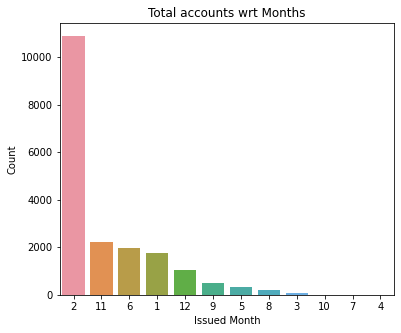

In [34]:
plt.figure(figsize=(6,5))
plt.title('Total accounts wrt Months')
ax = sns.countplot(x = "issue_month", data = master, order = master['issue_month'].value_counts(sort=True).index);
ax.set(xlabel='Issued Month', ylabel='Count')
plt.show()

In [35]:
N_fraud = df_credit[df_credit['NP'] == 0]
Fraud = df_credit[df_credit['NP'] == 1]

cc_Nfraud_Data = N_fraud.copy()
cc_fraud_Data = Fraud.copy()

In [36]:
#Fraud data
cc_fraud_Data['portfolio_id'] = '20' + cc_fraud_Data['portfolio_id'].astype(str)

In [37]:
cc_fraud_Data['portfolio_id'] = pd.to_datetime(cc_fraud_Data['portfolio_id'], format='%Y%m')

In [38]:
#Extracting Year
cc_fraud_Data['year'] = cc_fraud_Data['portfolio_id'].dt.year

#Extracting Month
cc_fraud_Data['month'] = cc_fraud_Data['portfolio_id'].dt.month

#Extracting Month
cc_fraud_Data['week'] = cc_fraud_Data['portfolio_id'].dt.isocalendar().week

#Extracting day of week
cc_fraud_Data['dayofweek'] = cc_fraud_Data['portfolio_id'].dt.dayofweek

In [39]:
cc_Nfraud_Data['portfolio_id'] = '20' + cc_Nfraud_Data['portfolio_id'].astype(str)
cc_Nfraud_Data['portfolio_id'] = pd.to_datetime(cc_Nfraud_Data['portfolio_id'], format='%Y%m')

In [40]:
#Extracting Year
cc_Nfraud_Data['year'] = cc_Nfraud_Data['portfolio_id'].dt.year

#Extracting Month
cc_Nfraud_Data['month'] = cc_Nfraud_Data['portfolio_id'].dt.month

#Extracting Month
cc_Nfraud_Data['week'] = cc_Nfraud_Data['portfolio_id'].dt.isocalendar().week

#Extracting day of week
cc_Nfraud_Data['dayofweek'] = cc_Nfraud_Data['portfolio_id'].dt.dayofweek

In [41]:
grouped_fraud = cc_fraud_Data.groupby(['month'])
grouped_Nfraud = cc_Nfraud_Data.groupby(['month'])

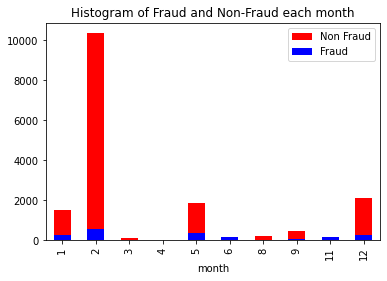

In [42]:
size_N = grouped_Nfraud.size()
size_f = grouped_fraud.size()
size_N.plot(subplots=True, color = 'r',kind='bar', label = "Non Fraud")
size_f.plot(subplots=True, color = 'b',kind='bar', label = "Fraud")

plt.title("Histogram of Fraud and Non-Fraud each month")
plt.legend()

[Text(0.5, 0, 'Issue Date'), Text(0, 0.5, 'Product Credit Limit')]

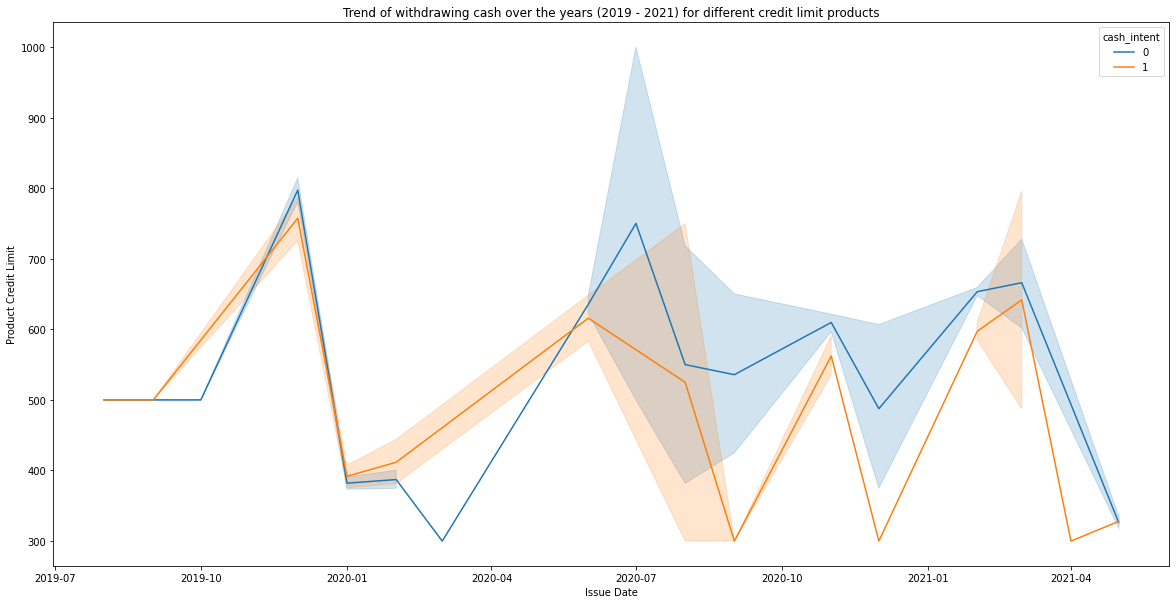

In [43]:
plt.figure(figsize=(20, 10))
ax = sns.lineplot(x="portfolio_id", y="product_term_credit_limit", hue="cash_intent",data=master)
plt.title('Trend of withdrawing cash over the years (2019 - 2021) for different credit limit products')
ax.set(xlabel='Issue Date',ylabel='Product Credit Limit')

## Grabbing the Top Fifty Most Correlated Features

Grabbing the top fifty most correlated features will make the data frame easier to work with while still preserving its most relevant features. To do this we used a random forest classifier that compares the correlation between the  2344 features in our dataset and our target variable NP. 

In [44]:
df = pd.read_csv("credit_numeric.csv")

In [45]:
df.head()

,record_nb,cash_intent,ALJ0300,ALJ0316,ALJ0416,ALJ5030,ALJ5320,ALJ5730,ALJ5820,ALJ5830,...,month_7,month_8,month_9,month_10,month_11,month_12,product_term_credit_limit_300,product_term_credit_limit_500,product_term_credit_limit_750,product_term_credit_limit_1000
0,1,0,2,1,1,33521,50283,0,698,698,...,0,1,0,0,0,0,0,1,0,0
1,2,0,0,98,98,999999998,999999998,999999998,999999998,999999998,...,0,1,0,0,0,0,0,1,0,0
2,3,0,1,0,0,999999997,999999997,999999997,999999997,999999997,...,0,1,0,0,0,0,0,1,0,0
3,4,0,0,98,98,999999998,999999998,999999998,999999998,999999998,...,0,1,0,0,0,0,0,1,0,0
4,5,1,2,0,0,999999997,999999997,999999997,999999997,999999997,...,0,1,0,0,0,0,0,1,0,0


In [68]:
#find missing values 
df.isnull().any()

record_nb                         False
cash_intent                       False
ALJ0300                           False
ALJ0316                           False
ALJ0416                           False
ALJ5030                           False
ALJ5320                           False
ALJ5730                           False
ALJ5820                           False
ALJ5830                           False
ALJ8120                           False
ALJ8220                           False
ALL0000                           False
ALL0060                           False
ALL0061                           False
ALL0100                           False
ALL0101                           False
ALL0102                           False
ALL0133                           False
ALL0135                           False
ALL0136                           False
ALL0200                           False
ALL0201                           False
ALL0206                           False
ALL0216                           False


In [47]:
#dropping null values
df.dropna(inplace = True)
df.shape

(19030, 2346)

In [48]:
#spliting up the dataset
X = df.drop('record_nb', axis = 1)
y = df_credit['NP']

In [49]:

model=RandomForestClassifier()
 
model.fit(X,y)
 
feature_importances=pd.DataFrame({'features':X.columns,'feature_importance':model.feature_importances_})
feature_importances=feature_importances.sort_values('feature_importance',ascending=False)

### Create a new dataframe with the columns with higher feature importance

In [50]:
#Grab the first 
features = feature_importances.head(50)
features.head()

,features,feature_importance
2333,month_5,0.041591
1537,REV7110,0.002745
2330,month_2,0.002708
2328,year_2021,0.002545
331,ALL8020,0.002468


In [51]:
smaller_df = df[['cash_intent', 'record_nb','ALL8270','IQT9420','ALL8370','ALL0218',
                 'ALL8220','ALS8220','ALL8221', 'ILN5400', 'ALL8020',
                 'ALX8220','ALS5400','IQT9427','ALL8352','ALL4520',
                 'IQT9526','ALL0000','ALL8225', 'ALL5460', 'IQB9540',
                 'ILN8320', 'IQT9410', 'ALS0000', 'ALL5321', 'ALL7130',
                 'ALL8321','ALL8320', 'BRC5620', 'ILN8220', 'ALL8325',
                 'AUA5400', 'TBCA3527', 'ALX5020', 'BCC8132', 'ALX5030',
                 'ALL8355', 'ALL7120', 'ALL8152', 'ALL0200', 'IQT9426',
                 'ALL5935', 'REV5620', 'ALL8358', 'ALL5320', 'ALL5835',
                 'ALL5030', 'BRC8220', 'TBCA2526', 'ALL5360', 'ALL4028',
                 'year_2019', 'year_2020', 'year_2021', 'product_term_credit_limit_300',
                 'product_term_credit_limit_500', 'product_term_credit_limit_750', 
                 'product_term_credit_limit_1000']]
smaller_df.head()

,cash_intent,record_nb,ALL8270,IQT9420,ALL8370,ALL0218,ALL8220,ALS8220,ALL8221,ILN5400,...,TBCA2526,ALL5360,ALL4028,year_2019,year_2020,year_2021,product_term_credit_limit_300,product_term_credit_limit_500,product_term_credit_limit_750,product_term_credit_limit_1000
0,0,1,156,9,31,8,189,189,189,50283,...,179.0,0,112,1,0,0,0,1,0,0
1,0,2,85,22,21,11,127,127,127,11223,...,1800.0,13658,56,1,0,0,0,1,0,0
2,0,3,125,12,30,26,174,89,45,16736,...,3938.0,13818,363,1,0,0,0,1,0,0
3,0,4,84,4,29,27,150,150,150,31569,...,999999997.0,304289,0,1,0,0,0,1,0,0
4,1,5,49,3,18,2,77,77,28,21497,...,191.0,34724,8,1,0,0,0,1,0,0


In [52]:
## Examining the Cash Intent, Credit Term Limits, and Years of Operation
smallest_df =    smaller_df[['cash_intent','year_2019', 'year_2020', 'year_2021', 'product_term_credit_limit_300',
                 'product_term_credit_limit_500', 'product_term_credit_limit_750', 
                 'product_term_credit_limit_1000']]
smallest_df.head()

,cash_intent,year_2019,year_2020,year_2021,product_term_credit_limit_300,product_term_credit_limit_500,product_term_credit_limit_750,product_term_credit_limit_1000
0,0,1,0,0,0,1,0,0
1,0,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0
4,1,1,0,0,0,1,0,0


### Correlation relationship between categorical features

<AxesSubplot:>

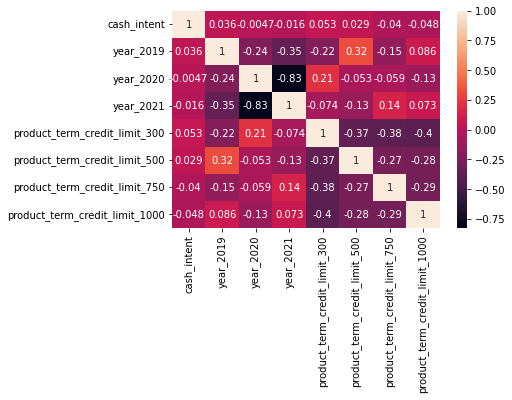

In [53]:
correlation = smallest_df.corr()
sns.heatmap(correlation, xticklabels =  correlation.columns, yticklabels = correlation.columns, annot= True)

### Percentage of the Data for Each Year of Operation

In [54]:
smallest_df['year_2019'].value_counts()

0    17308
1     1722
Name: year_2019, dtype: int64

In [55]:
smallest_df['year_2020'].value_counts()

0    12227
1     6803
Name: year_2020, dtype: int64

In [56]:
smallest_df['year_2021'].value_counts()

1    10505
0     8525
Name: year_2021, dtype: int64

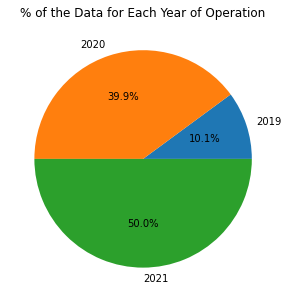

In [57]:
plt.figure(figsize = (5,5))

labels = ["2019", "2020", "2021"]
values = [1722, 6803, 8525]

plt.pie(values, labels = labels, autopct = '%2.1f%%')
plt.title("% of the Data for Each Year of Operation")
plt.show()

### Percentage of Missed Payments Based on Credit Limits

In [58]:
smallest_df.shape

(19030, 8)

In [59]:
smallest_df = pd.concat([smallest_df,df_credit['NP']],axis=1, join='inner')

In [60]:
vc_300 = smallest_df['product_term_credit_limit_300'].value_counts()
vc_300

0    12461
1     6568
Name: product_term_credit_limit_300, dtype: int64

In [61]:
vc_500 = smallest_df['product_term_credit_limit_500'].value_counts()

In [62]:
vc_750 = smallest_df['product_term_credit_limit_750'].value_counts()

In [63]:
vc_1000 = smallest_df['product_term_credit_limit_1000'].value_counts()

In [64]:
print("300:", vc_300[1]/(vc_300[0]+vc_300[1]),"\n", "500:", vc_500[1]/(vc_500[0]+vc_500[1]),"\n", "750:", vc_750[1]/(vc_750[0]+vc_750[1]),"\n" "1000", vc_1000[1]/(vc_1000[0]+vc_1000[1]))

300: 0.3451573913500447 
 500: 0.20663198276315098 
 750: 0.21871879762467814 
1000 0.22949182826212622


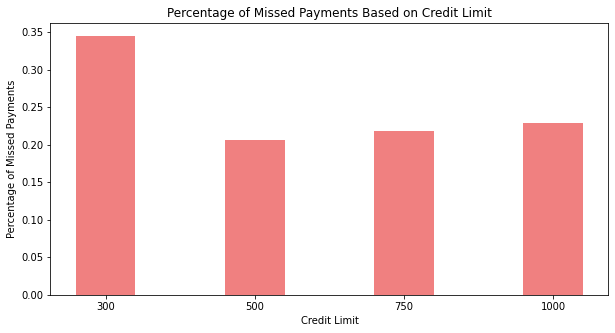

In [65]:
# creating the dataset
data = {'300': 0.345, '500':0.206, '750':0.218,
        '1000': 0.229}
credit = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(credit, values, color ='lightcoral',
        width = 0.4)
 
plt.xlabel("Credit Limit")
plt.ylabel("Percentage of Missed Payments")
plt.title("Percentage of Missed Payments Based on Credit Limit")
plt.show()